# Introduction to Scikit-Learn(sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-learn workflow
1. Getting the data rady
2. Choose the right estimator/algorithm for our problems
3. Fit the model / algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [1]:
what_were_covering = [
    "0. An end-to-end Scikit-learn workflow",
"1. Getting the data rady",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model / algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]

In [2]:
# Standard import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# 1. get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create x (feature matrix)
x= heart_disease.drop("target",axis=1)
# create y (labels)
y = heart_disease["target"]


In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# we'll keep the default hyperparameters
clf.get_params()




{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3.fit the model to the traning data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
clf.fit(x_train, y_train);

In [8]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1


In [9]:
# make a prediction
# y_label = clf.predict(np.array([0,2,3,4]))

In [10]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [11]:
y_test

5      1
58     1
93     1
152    1
137    1
      ..
17     1
239    0
91     1
200    0
296    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.7377049180327869

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        27
           1       0.76      0.76      0.76        34

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



In [15]:
confusion_matrix(y_test,y_preds)

array([[19,  8],
       [ 8, 26]], dtype=int64)

In [16]:
accuracy_score(y_test,y_preds)

0.7377049180327869

In [17]:
# 5.Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%")
    print(" ")

Trying model with 10 estimators..
Model accuracy on test set: 68.85%
 
Trying model with 20 estimators..
Model accuracy on test set: 73.77%
 
Trying model with 30 estimators..
Model accuracy on test set: 75.41%
 
Trying model with 40 estimators..
Model accuracy on test set: 67.21%
 
Trying model with 50 estimators..
Model accuracy on test set: 73.77%
 
Trying model with 60 estimators..
Model accuracy on test set: 70.49%
 
Trying model with 70 estimators..
Model accuracy on test set: 72.13%
 
Trying model with 80 estimators..
Model accuracy on test set: 72.13%
 
Trying model with 90 estimators..
Model accuracy on test set: 73.77%
 


In [18]:
# 6. Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.7377049180327869

## 1.Getting our data ready to be used with machine learning
Three main thing we have to do:
   1. Split the data into feature and labels(usually `X` & `y`)
   2. Filling (also called imputing ) or disregarding missing values
   3. Converting non-numerical values to numerical values (also called feature encoding)



In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical


In [25]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# split into X/y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Build  machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)


In [29]:
# Trun the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]], dtype=float)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
996,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some Value(also known as imputation).
2. Reamove the sample with missing data altogether.



In [36]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
# Create X & y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [39]:
# lets try and convert our data to numbers
# Trun the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X



<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [40]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [42]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Doors" Columns
car_sales_missing["Doors"].fillna(4,inplace=True)


In [43]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [44]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [45]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
len(car_sales_missing)

950

In [47]:
# Create X & y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [48]:
# lets try and convert our data to numbers
# Trun the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X



array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2: Fill missing values with Scikit-Learn

In [49]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [52]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [53]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [54]:
car_sales_filled =pd.DataFrame(filled_X,
                               columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [55]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [56]:
# lets try and convert our data to numbers
# Trun the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X



<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [57]:
# Now we've got our data as numbers and filled(no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(transformed_X,y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)


0.21990196728583944

In [58]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2.Choosing the right estimator/algorithm for your problem

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
   * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of car)

  If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/


## 2.1 Picing a machinelearning model for a regression problem
let's use the californina Housing dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [59]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [60]:
housing_df = pd.DataFrame(housing["data"],columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
# housing_df = housing_df.drop("MedHouseVal", axis = 1)

In [63]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
# Import algorithm / estimator
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)
#crate the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440131

What if ` Ridge` didn't work or the score didint fit our needs?

Well, we could always try a different model

How about we try an ensemble model ( an ensemble is combination of smaller models to try and make better prediction than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [65]:
# Import the RandomForestRegressor model class fromm the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# create the data 
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test sets)

model.score(X_test, y_test)


0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem
Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [66]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Counsulting the map and it says to try `LinearSVC`.

In [67]:
# Import the  RandomForestClassifier  estimator classs
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
# creating LinearSVC model
clf = LinearSVC()
clf.fit(X_train,y_train)
# Score
clf.score(X_test,y_test)

C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [68]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [69]:
# Import the  RandomForestClassifier  estimator classs
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
# creating RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
# Score
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning


In [70]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3.Fit the model/algorithm on our data and use it to make prediction 
### 3.1 Fitting the model to the data
Different names for: 

* `X` = features, features variables, data. 
* `y `= labels, target, target variables.


In [71]:
# Import the  RandomForestClassifier  estimator classs
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
# creating RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has prediction)
clf.score(X_test,y_test)

0.8524590163934426

In [72]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
   1. `predict()`
   2. `predict_proba`

In [74]:
# Use a training model to make predictions
# clf.predict(np.array([1,7,8,3,4])) # this doesn't work....


In [75]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [76]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [78]:
# Compare prediction to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [79]:
clf.score(X_test, y_test)

0.8524590163934426

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)


0.8524590163934426

 Make prediction with predict_proba()


In [81]:
# pricdit_probo() return probabilities of classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [82]:
# lets predict() on the same data....
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [83]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [84]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models.

In [85]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [86]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data 
model.fit(X_train,y_train)

# make predictions
y_preds = model.predict(X_test)



In [87]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [88]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [89]:
len(y_preds)

4128

In [90]:
len(y_test)

4128

In [91]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [92]:
# housing_df["preds"] = y_preds
# housing_df.head()

In [93]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model 
Three ways to evaluate Scikit-learn model/estimators:

  1. Estimator's built-in `score()` methods
  2. The `Scoring` parameter
  3. Problem-specific metric functions
      
You can read more about three here: https://scikit-learn.org/stable/modules/model_evaluation.html


### 4.1 Evaluating a model with the `score` method 

In [94]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Create classification model instance 
clf = RandomForestClassifier(n_estimators=100)


# fit classifier to training data
clf.fit(X_train,y_train)

# Evaluating model score 

clf.score(X_test, y_test)



0.8524590163934426

In [96]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [97]:
clf.score(X_test, y_test)

0.8524590163934426

let's use the `score()` on our regression problem...

In [98]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create X & y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Create classification model instance 
model = RandomForestRegressor(n_estimators=50)


# fit classifier to training data
model.fit(X_train,y_train)

# Evaluating model score 
# The default score() evaluation metric is r_squared for regression algorithm
# Highest = 1.0, lowest = 0.0

(model.score(X_test, y_test),
model.score(X_train, y_train))



(0.8040661003828089, 0.9724613502567376)

In [99]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [100]:
y_test.mean()

2.0550030959302323

## 4.2 Evaluating a model using the `scoring` parameter

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Create classification model instance 
clf = RandomForestClassifier(n_estimators=100)


# fit classifier to training data
clf.fit(X_train,y_train)

# Evaluating model score 

clf.score(X_test, y_test)



0.8524590163934426

In [102]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [103]:
cross_val_score(clf,X,y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [104]:
np.random.seed(42)
# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score
                              

(0.8524590163934426, 0.8248087431693989)

In [105]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [106]:
# Scoring parameter set to None by default
cross_val_score(clf, X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf =RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)
cross_val_score



array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [108]:
np.mean(cross_val_score)

0.8248087431693989

In [109]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curve are a comparision of model's true positive rate (TRP) veruses a model false positive rate (FPR)

* True positive = model predict 1 when truth is 1
* False positive = model predict 1 when truth is 0
* True negative = model predict 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [110]:
# Create X_test... etc
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [111]:
from sklearn.metrics import roc_curve
# Fit the classifier
clf.fit(X_train, y_train)

# make prediction with probabilities

y_probs= clf.predict_proba(X_test)
y_probs[:10]



array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [112]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [113]:
# Calculate FPR, TPR and Thresholds
FPR,TPR,Thresholds = roc_curve(y_test, y_probs_positive)
# Check the false positive rates
FPR

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

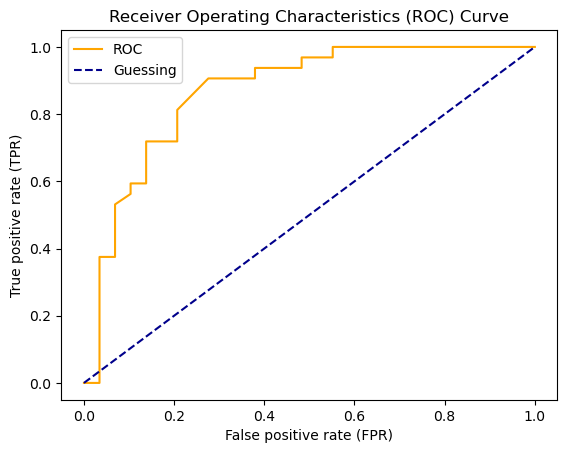

In [114]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(FPR,TPR):
    """
    Plots a ROC curve given the false positive rate (FPR)
    and true positive rate (TPR) of a model.
    """
    # Plot roc curve
    plt.plot(FPR,TPR,color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(FPR,TPR)




    

In [115]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

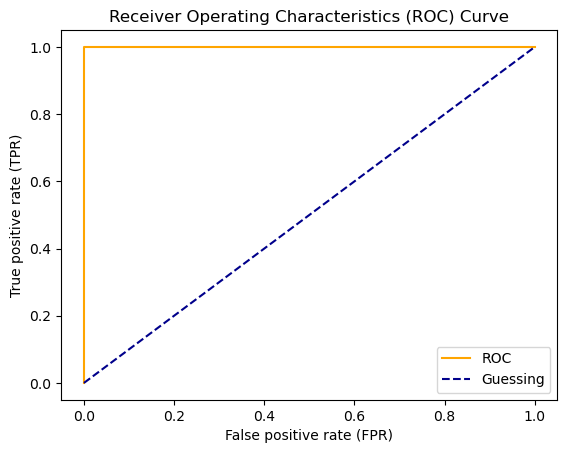

In [116]:
# Plot perfect ROC curves and AUC score
FPR,TPR,Thresholds = roc_curve(y_test,y_test)
plot_roc_curve(FPR,TPR)

In [117]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the label a model predicts and the actual
labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [118]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [119]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [120]:
# How to install pandas object in jupyter noteboook

# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

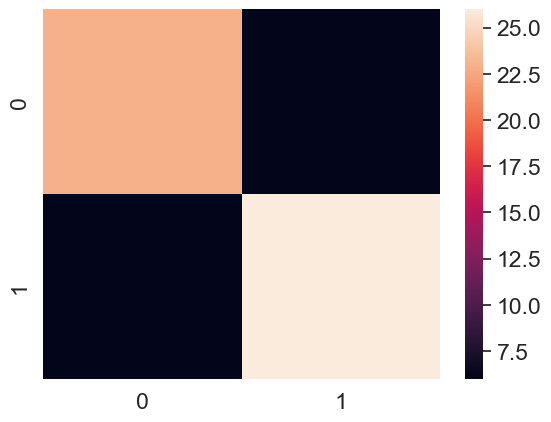

In [121]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot is using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-learn

To use the new methods of creating matrix with Scikit-Learn you will need sklearn version 1.0+ - https://scikit-learn.org/stable/install.html

In [122]:
import sklearn 
sklearn.__version__

'1.3.0'

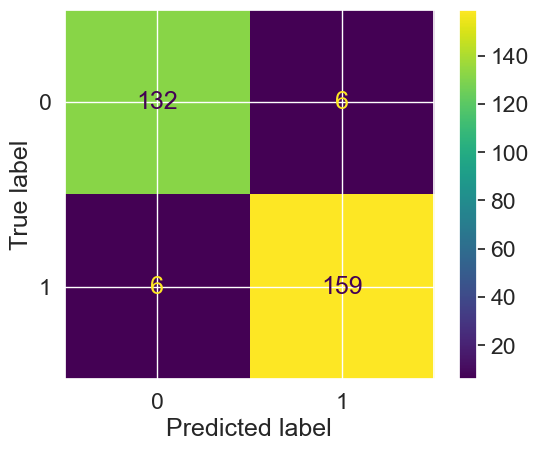

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

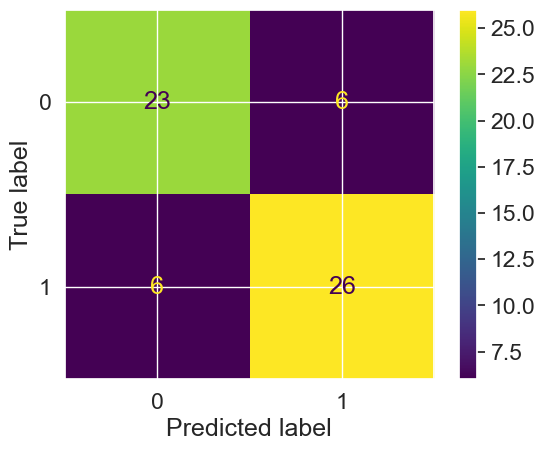

In [124]:
ConfusionMatrixDisplay.from_predictions(y_true =y_test,
                                        y_pred=y_preds);

In [125]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(clf,X,y)

 **Classifiaction Report**

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [127]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as )
pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
   * **Accuracy** is good measure to start with if all classes are balanced(e.g.same amount of sample).
   * **Precision** and **recall** become more important when classes are imbalance.
   * If false positive predictions are worse than false negative, aim for higher precision.
   * If false negative predictions are worse tha false positive, aim for higher recall.
   * **F1-score** is a combination of precision and recall.
    

### 4.2.2 Regretion model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)

In [128]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [129]:
model.score(X_test, y_test)

0.8065734772187598

In [130]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [131]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [132]:
y_test.mean()

2.0550030959302323

In [133]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean 
y_test_mean = np.full(len(y_test),y_test.mean())

In [134]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [135]:
r2_score(y_true=y_test,y_pred = y_test_mean)

0.0

In [136]:
r2_score(y_true=y_test,y_pred = y_test)

1.0

**Mean absolute error(MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [137]:
# MEA
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [138]:
y_preds


array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [139]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)
                        

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [140]:
# MAE using formula
np.abs(df["differences"]).mean()

0.32659871732073664

In [141]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

**Mean suquared error(MSE)**

MSE is  the mean of the square of the errors between actual and predicted values.



In [142]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [143]:
df["squared_difference"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [144]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()


0.2534678520824551

In [145]:
# this not work
df_large_error = df.copy()
df_large_error.iloc[0]["squared_difference"] = 16

In [146]:
df_large_error.head()

,actual values,predicted values,differences,squared_difference
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [147]:
# Calculate MSE with large error
df_large_error["squared_difference"].mean()

0.2573437523766412

In [148]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_difference
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [149]:
# Calculate MSE with large error
df_large_error["squared_difference"].mean()

0.7334180712088106

## 4.2.3 Finally using the `scoring` parameter
using scoring parameter we calculate various scoring matrix
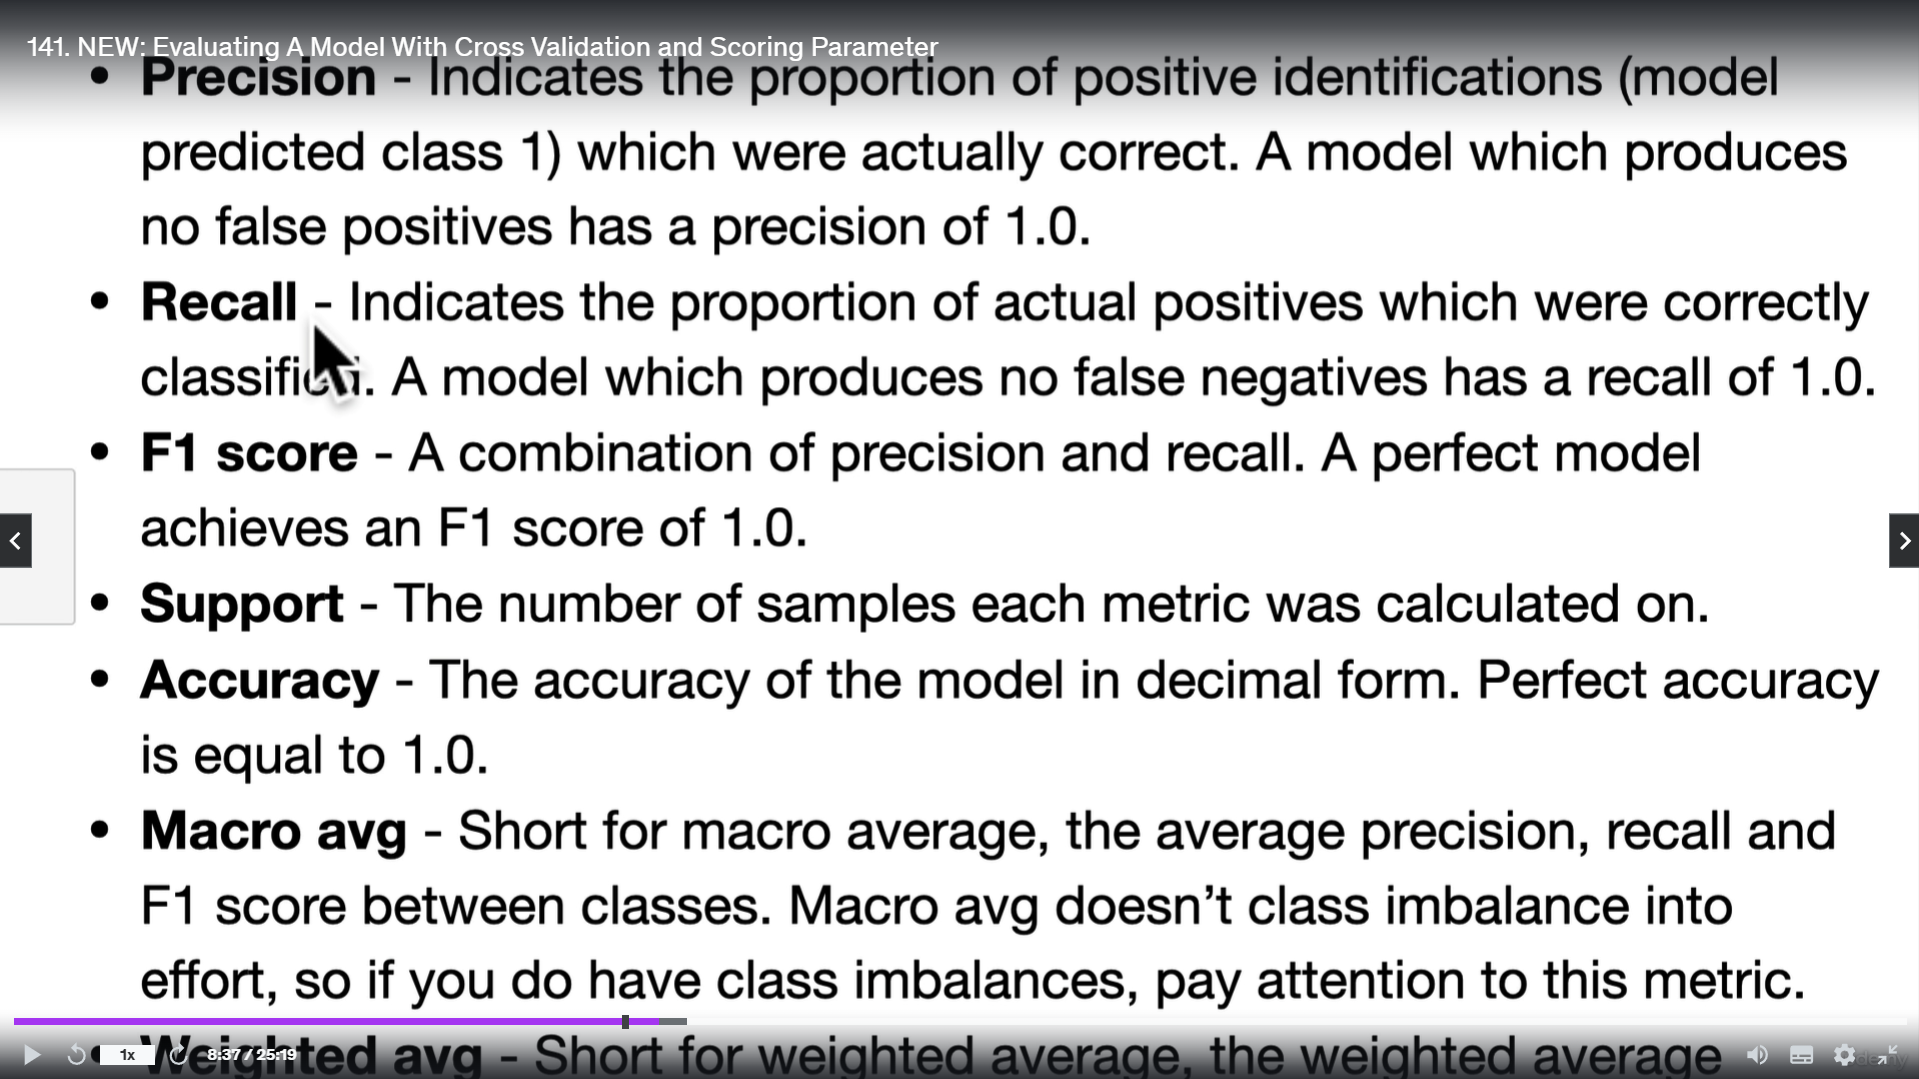

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)



In [151]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used(accuary)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [152]:
# Cross-validation accuarcy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [153]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy") # if scoring=None, estimator's default scoring evaluation metric is used(accuary)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [154]:
# Cross-validartion accuaracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [155]:
# precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [156]:
# Crosss-validated precision
print(f"The cross-validation precision is: {np.mean(cv_precision)}")

The cross-validation precision is: 0.8329547346025924


In [157]:
# Recall 
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [158]:
# Crosss-validated recall
print(f"The cross-validation precision is: {np.mean(cv_recall)}")

The cross-validation precision is: 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem...

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

                    

In [160]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [161]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [162]:
# Mean absolute error
cv_mse = cross_val_score(model, X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [163]:
# Mean squared error
cv_mae = cross_val_score(model,X,y ,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [164]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

### 4.3 Using different evaluation metrics as Scikit-learn functions

the 3rd way to evaluate scikit-learn machine learning models/estimators is to using `sklearn.metrics` module-https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop('target',axis=1)
y= heart_disease['target']

np.random.seed(42)
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
clf.score(X_test,y_test)




0.8524590163934426

In [166]:

y_preds = clf.predict(X_test)
print(accuracy_score(y_test,y_preds),
precision_score(y_test,y_preds),recall_score(y_test,y_preds),f1_score(y_test,y_preds))

0.8524590163934426 0.8484848484848485 0.875 0.8615384615384615


In [167]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = housing_df.drop('target',axis=1)
y = housing_df['target']

np.random.seed(42)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8065734772187598

In [168]:
y_preds = model.predict(X_test)
print(r2_score(y_test,y_preds),mean_absolute_error(y_test,y_preds),mean_squared_error(y_test,y_preds))

0.8065734772187598 0.32659871732073664 0.2534678520824551


In [169]:
y_preds = model.predict(X_test)
print(r2_score(y_test,y_preds),mean_absolute_error(y_test,y_preds),mean_squared_error(y_test,y_preds))

0.8065734772187598 0.32659871732073664 0.2534678520824551


## 5.Improving a model

First prediction = baseline predictions

First model = baseline model.

From a data perspective:

  * Could we collect more data? (generally, the more data, the better)
  * Could we improve our data?

    
From a model perspective:

  *  Is there a beeter model we could use?
  *  Could we improve the current model?
    
Hyperparameters vs Parameters:

  * Paarameters = model find  these patterns in data
  * Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to     find patterns

Three ways to adjust hyperparameter:
   1. By hand
   2. Randomly with RandomSearchCV
   3. Exhaustively with GridSearchCv

In [170]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [171]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**5.1 Tuning hyperparameters by hand**

let's make 3 sets, training, validation and test.


In [172]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjusts:
   * max_depth
   * max_features
   * min_samples_leaf
   * min_sample_split
   * n_estimators

read more: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html    
char gpt info: https://chatgpt.com/c/2c98ef0f-c35b-41fc-8d98-55a7da530ccc

In [173]:
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparision on y_true lables vs y_pred labels.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = { "accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)   }
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    return metric_dict

In [174]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)
# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train,y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]
len(X_train), len(X_valid),len(X_test)


(212, 45, 46)

In [175]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds) # it is define funtion by me look up there
baseline_metrics

Acc:82.22%
Precision:0.81
Recall:0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [176]:
np.random.seed(42)
# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)
# Evalute the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)


Acc:82.22%
Precision:0.84
Recall:0.84
F1 score:0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [177]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}
np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCv
rs_clf = RandomizedSearchCV(estimator=clf,param_distributions=grid,
                           n_iter = 10, # number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\base.py", line 637,

In [178]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [179]:
# Make prdiction with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)
# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [180]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [181]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [182]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCv
gs_clf = GridSearchCV(estimator=clf,param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\a\Machine_learning\Machine_learning\learning\env\Lib\site-packages\sklearn\base.py", line 637,

In [183]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [184]:
gs_y_preds = gs_clf.predict(X_test)
# evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)


Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


let's compare our different models metrics.

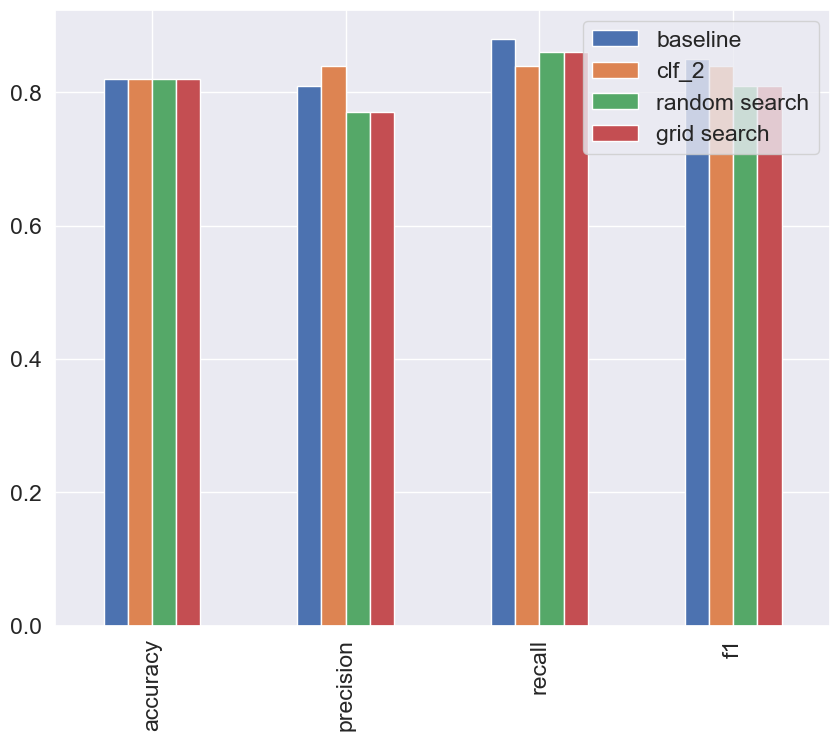

In [185]:
compared_metrics = pd.DataFrame({"baseline":baseline_metrics ,
                               "clf_2":clf_2_metrics,
                                 "random search": rs_metrics,
                                 "grid search": gs_metrics})
compared_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models
Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module
   
**Pickle**

In [186]:
import pickle
# Save an extisting model to file
pickle.dump(gs_clf,open("gs_random_random_forest_model_1.pkl","wb"))

In [187]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [188]:
# Make some predictions
pickle_y_preds =loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**joblib**

In [189]:
from joblib import dump,load
# Save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")



['gs_random_forest_model_1.joblib']

In [190]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [191]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [192]:
what_were_covering

['0. An end-to-end Scikit-learn workflow',
 '1. Getting the data rady',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model / algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 7.Putting it all together!

In [193]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [194]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [195]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Step we want to do (all in one cell):
   1. Fill missing data
   2. Convert data to numbers
   3. Build a model on data

In [196]:
# Getting data ready 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different feature and transform pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                           ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
                   ("imputer",SimpleImputer(strategy="constant",fill_value=4))])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))    
])

# Setup preprocessing step (fill missing value, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat",categorical_transformer,categorical_features),
                        ("door",door_transformer,door_feature),
                        ("num",numeric_transformer,numeric_features)
                    ])
# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model",RandomForestRegressor(n_estimators=100))])
# Split data
X = data.drop("Price",axis=1)
y = data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)




0.22188417408787875

It's also possible to use `GridSearchCv` or `RandomizedSearchCV` with our `Pipeline`.

In [199]:
# Use GridSearchCv with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
     "preprocessor__num__imputer__strategy":["mean","median"],
     "model__n_estimators":[100,1000],
     "model__max_depth":[None,5],
     "model__min_samples_split":[2,4], 
    
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_spli

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [198]:
gs_model.score(X_test,y_test)

0.3339554263158365